In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from datetime import datetime

In [98]:
path = Path.cwd().parent.parent
filePath = str(path) + "/data_cleanup/train_data_cleaned.parquet"
df = pd.read_parquet(filePath)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14824 entries, 0 to 31633
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   reservation_id      14824 non-null  int64         
 1   stay_date           14824 non-null  datetime64[ns]
 2   guest_id            14824 non-null  int64         
 3   guest_country_id    14824 non-null  object        
 4   reservation_status  14824 non-null  object        
 5   reservation_date    14824 non-null  datetime64[ns]
 6   date_from           14824 non-null  datetime64[ns]
 7   date_to             14824 non-null  datetime64[ns]
 8   resort_id           14824 non-null  int64         
 9   cancel_date         2764 non-null   object        
 10  room_cnt            14824 non-null  int64         
 11  adult_cnt           14824 non-null  int64         
 12  children_cnt        14824 non-null  int64         
 13  price               12845 non-null  float64       


In [99]:
df['reservation_status'].unique()

array(['Checked-out', 'Cancelled', 'No-show'], dtype=object)

In [100]:
df_checkedOut = df[df['reservation_status'] == 'Checked-out']

In [101]:
df_checkedOut.to_csv('data_Checked-out.csv', index=False)

In [102]:
df_checkedOut.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12060 entries, 0 to 31633
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   reservation_id      12060 non-null  int64         
 1   stay_date           12060 non-null  datetime64[ns]
 2   guest_id            12060 non-null  int64         
 3   guest_country_id    12060 non-null  object        
 4   reservation_status  12060 non-null  object        
 5   reservation_date    12060 non-null  datetime64[ns]
 6   date_from           12060 non-null  datetime64[ns]
 7   date_to             12060 non-null  datetime64[ns]
 8   resort_id           12060 non-null  int64         
 9   cancel_date         0 non-null      object        
 10  room_cnt            12060 non-null  int64         
 11  adult_cnt           12060 non-null  int64         
 12  children_cnt        12060 non-null  int64         
 13  price               11948 non-null  float64       


In [103]:
df_checkedOut_2008 = df_checkedOut[df_checkedOut['date_from'].dt.year == 2008]
df_checkedOut_2008.head()

,reservation_id,stay_date,guest_id,guest_country_id,reservation_status,reservation_date,date_from,date_to,resort_id,cancel_date,room_cnt,adult_cnt,children_cnt,price,price_tax,total_price_tax,total_price,food_price,food_price_tax,other_price,other_price_tax,room_category_id,sales_channel_id,stay_nights,price_per_night
2,74464,2008-01-01,106278,HR,Checked-out,2007-12-29,2008-01-01,2008-01-02,1,None,1,2,0,4336.857,433.693,3806.147,19764.823,530.929,53.071,14897.037,3319.383,4,4.0,1.0,4336.857
6,74470,2008-01-01,38936,GB,Checked-out,2007-12-29,2008-01-01,2008-01-02,1,None,1,3,0,8536.766,853.662,1012.948,10392.280,1592.714,159.286,262.800,0.000,4,3.0,1.0,8536.766
7,74460,2008-01-01,38936,GB,Checked-out,2007-12-29,2008-01-01,2008-01-02,1,None,1,3,0,8536.766,853.662,1012.948,10392.280,1592.714,159.286,262.800,0.000,5,3.0,1.0,8536.766
8,74493,2008-01-01,106460,HR,Checked-out,2008-01-01,2008-01-01,2008-01-02,1,None,1,2,0,3996.239,399.602,650.138,5512.303,530.929,53.071,985.135,197.465,4,4.0,1.0,3996.239
9,74495,2008-01-01,106471,AUT,Checked-out,2008-01-01,2008-01-01,2008-01-02,1,None,1,2,0,4336.857,433.693,3008.622,16398.428,530.929,53.071,11530.642,2521.858,7,3.0,1.0,4336.857


In [151]:
df_checekedOut_2009 = df_checkedOut[df_checkedOut['date_from'].dt.year == 2009]

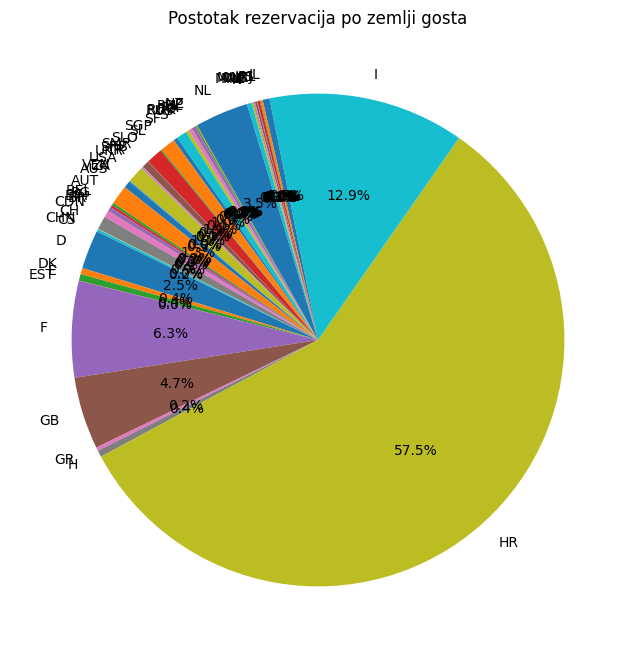

In [105]:
frekvencija_po_zemlji = df_checkedOut_2008['guest_country_id'].value_counts().sort_index()

plt.figure(figsize=(10, 8))
plt.pie(frekvencija_po_zemlji, labels=frekvencija_po_zemlji.index, autopct='%1.1f%%', startangle=140)
plt.title('Postotak rezervacija po zemlji gosta')
plt.show()

In [106]:
df_null = df_checkedOut[df_checkedOut['price_per_night'].isna()]
df_null.head(100)

,reservation_id,stay_date,guest_id,guest_country_id,reservation_status,reservation_date,date_from,date_to,resort_id,cancel_date,room_cnt,adult_cnt,children_cnt,price,price_tax,total_price_tax,total_price,food_price,food_price_tax,other_price,other_price_tax,room_category_id,sales_channel_id,stay_nights,price_per_night
420,74803,2008-01-17,78636,HR,Checked-out,2008-01-17,2008-01-17,2008-01-18,1,None,1,1,0,NaN,NaN,52.50,532.00,NaN,NaN,NaN,NaN,7,4.0,1.0,NaN
499,74869,2008-01-19,106674,HR,Checked-out,2008-01-19,2008-01-19,2008-01-20,1,None,1,1,0,NaN,NaN,52.50,532.00,NaN,NaN,NaN,NaN,2,4.0,1.0,NaN
669,74943,2008-01-23,78636,HR,Checked-out,2008-01-23,2008-01-23,2008-01-24,1,None,1,1,0,NaN,NaN,52.50,532.00,NaN,NaN,NaN,NaN,6,4.0,1.0,NaN
935,75159,2008-01-31,60536,HR,Checked-out,2008-01-31,2008-01-31,2008-02-01,1,None,1,1,0,NaN,NaN,51.82,525.18,NaN,NaN,NaN,NaN,7,4.0,1.0,NaN
999,75195,2008-02-01,106674,HR,Checked-out,2008-02-01,2008-02-01,2008-02-02,1,None,1,1,0,NaN,NaN,52.50,532.00,NaN,NaN,NaN,NaN,5,4.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25181,88317,2009-08-11,78636,HR,Checked-out,2009-08-11,2009-08-11,2009-08-12,1,None,1,1,0,NaN,NaN,51.82,525.18,NaN,NaN,NaN,NaN,6,4.0,1.0,NaN
25219,88339,2009-08-12,128961,HR,Checked-out,2009-08-12,2009-08-12,2009-08-13,1,None,1,1,0,NaN,NaN,52.50,2892.00,NaN,NaN,NaN,NaN,5,4.0,1.0,NaN
25298,88384,2009-08-13,129022,HR,Checked-out,2009-08-13,2009-08-13,2009-08-14,1,None,1,1,0,NaN,NaN,52.50,532.00,NaN,NaN,NaN,NaN,2,4.0,1.0,NaN
25853,88603,2009-08-24,129985,HR,Checked-out,2009-08-24,2009-08-24,2009-08-25,1,None,1,1,0,NaN,NaN,52.50,532.00,NaN,NaN,NaN,NaN,2,3.0,1.0,NaN


In [107]:
dnevni_pregled = df_checkedOut.groupby(df_checkedOut['date_from'].dt.date).agg(
    adult_cnt=pd.NamedAgg(column='adult_cnt', aggfunc='sum')
).reset_index()
dnevni_pregled.head()

,date_from,adult_cnt
0,2007-12-13,1
1,2008-01-01,45
2,2008-01-02,4
3,2008-01-03,22
4,2008-01-04,19


In [108]:
dnevni_pregled['date_from'] = pd.to_datetime(dnevni_pregled['date_from'])
dnevni_pregled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_from  732 non-null    datetime64[ns]
 1   adult_cnt  732 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 11.6 KB


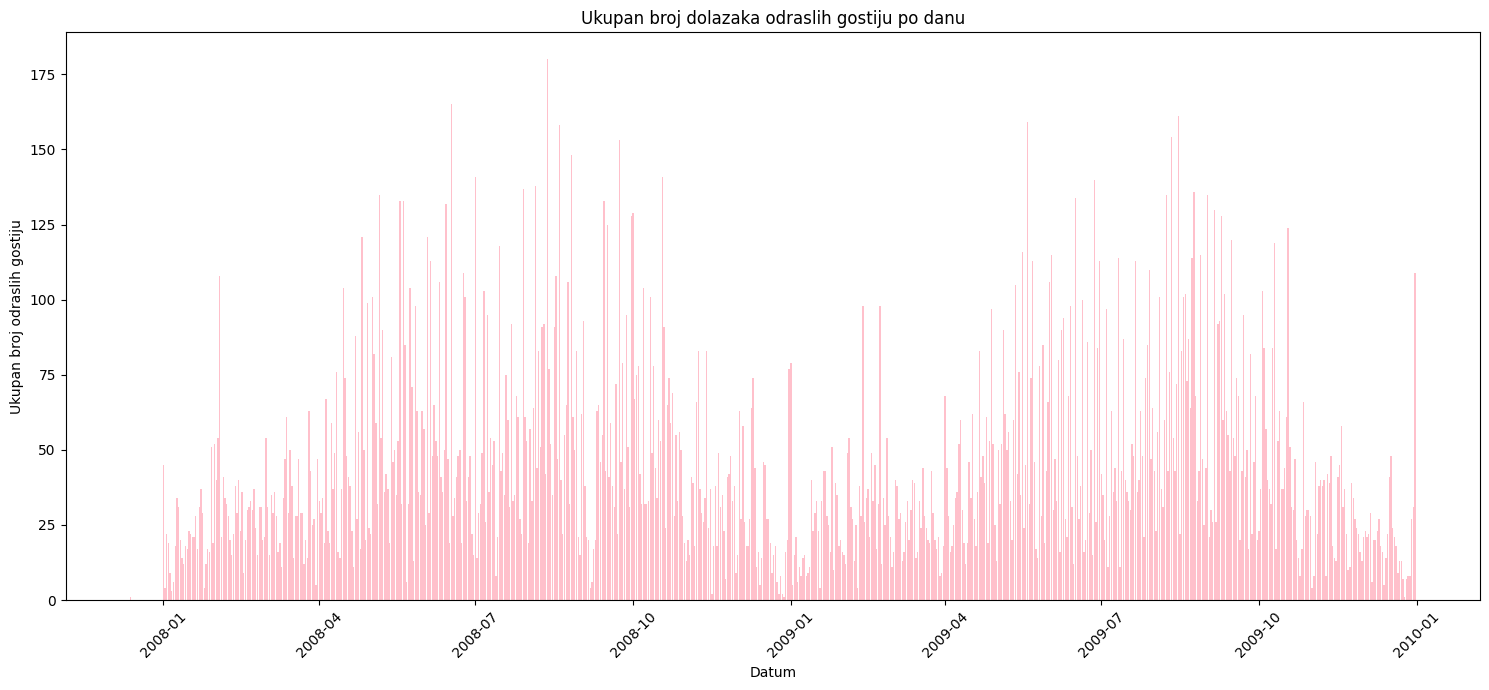

In [109]:
# Crtanje grafikona
plt.figure(figsize=(15, 7))  # Prilagodite veličinu prema potrebi
plt.bar(dnevni_pregled['date_from'], dnevni_pregled['adult_cnt'], color='pink')
plt.title('Ukupan broj dolazaka odraslih gostiju po danu')
plt.xlabel('Datum')
plt.ylabel('Ukupan broj odraslih gostiju')
plt.xticks(rotation=45)  # Rotira oznake na x-osi za bolju čitljivost
plt.tight_layout()  # Prilagodba layouta za sprečavanje preklapanja
plt.show()

In [110]:
dnevni_pregled_2008 = dnevni_pregled[dnevni_pregled['date_from'].dt.year == 2008]
dnevni_pregled_2008['date_from']= pd.to_datetime(dnevni_pregled_2008['date_from'])

/var/folders/v_/qfv7yz9j391chxy7g2hsq7hc0000gn/T/ipykernel_26451/1696968576.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dnevni_pregled_2008['date_from']= pd.to_datetime(dnevni_pregled_2008['date_from'])


In [111]:
dnevni_pregled_2009 = dnevni_pregled[dnevni_pregled['date_from'].dt.year == 2009]
dnevni_pregled_2009['date_from']= pd.to_datetime(dnevni_pregled_2009['date_from'])

/var/folders/v_/qfv7yz9j391chxy7g2hsq7hc0000gn/T/ipykernel_26451/1014152447.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dnevni_pregled_2009['date_from']= pd.to_datetime(dnevni_pregled_2009['date_from'])


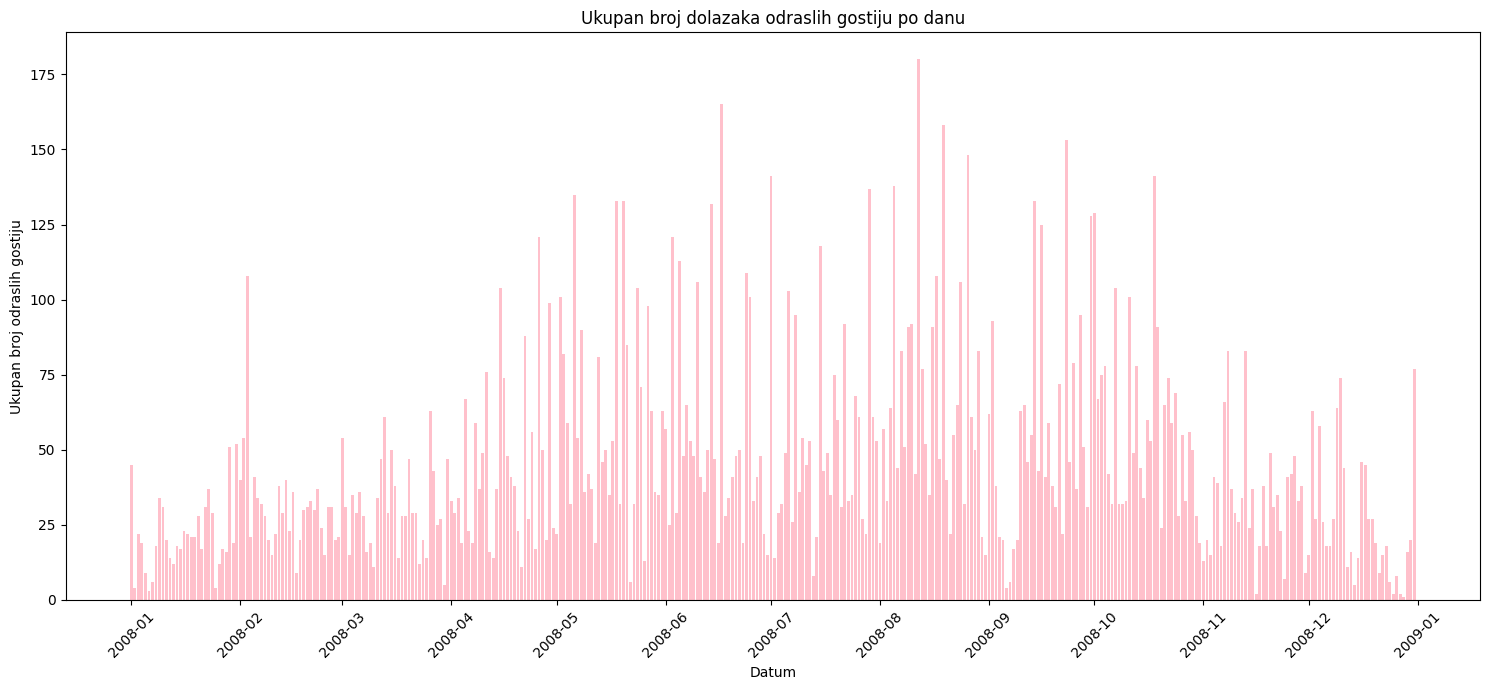

In [112]:
plt.figure(figsize=(15, 7))  # Prilagodite veličinu prema potrebi
plt.bar(dnevni_pregled_2008['date_from'], dnevni_pregled_2008['adult_cnt'], color='pink')
plt.title('Ukupan broj dolazaka odraslih gostiju po danu')
plt.xlabel('Datum')
plt.ylabel('Ukupan broj odraslih gostiju')
plt.xticks(rotation=45)  # Rotira oznake na x-osi za bolju čitljivost
plt.tight_layout()  # Prilagodba layouta za sprečavanje preklapanja
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator())
plt.show()

In [113]:
february = dnevni_pregled_2008[dnevni_pregled_2008['date_from'].dt.month == 2]

In [114]:
february

,date_from,adult_cnt
32,2008-02-01,40
33,2008-02-02,54
34,2008-02-03,108
35,2008-02-04,21
36,2008-02-05,41
37,2008-02-06,34
38,2008-02-07,32
39,2008-02-08,28
40,2008-02-09,20
41,2008-02-10,15


In [115]:
third_february = df_checkedOut_2008[df_checkedOut_2008['date_from'].dt.month == 2]
third_february

,reservation_id,stay_date,guest_id,guest_country_id,reservation_status,reservation_date,date_from,date_to,resort_id,cancel_date,room_cnt,adult_cnt,children_cnt,price,price_tax,total_price_tax,total_price,food_price,food_price_tax,other_price,other_price_tax,room_category_id,sales_channel_id,stay_nights,price_per_night
951,75205,2008-02-01,107046,HR,Checked-out,2008-02-01,2008-02-01,2008-02-02,1,None,3,3,0,13203.948,1320.351,1505.990,14711.909,935.787,93.513,572.174,92.126,5,3.0,1.0,13203.9480
952,75206,2008-02-01,38936,GB,Checked-out,2008-02-01,2008-02-01,2008-02-02,1,None,1,1,0,9130.986,664.446,1163.766,12672.946,1278.887,93.513,2263.073,405.807,5,3.0,1.0,9130.9860
955,75204,2008-02-01,61987,HR,Checked-out,2008-02-01,2008-02-01,2008-02-02,1,None,1,1,0,816.360,81.640,85.910,866.090,42.730,4.270,7.000,0.000,6,4.0,1.0,816.3600
958,75184,2008-02-01,19577,HR,Checked-out,2008-02-01,2008-02-01,2008-02-02,1,None,2,2,0,11014.970,1101.424,1255.892,12532.202,623.858,62.342,893.374,92.126,5,4.0,1.0,11014.9700
963,75202,2008-02-01,8652,HR,Checked-out,2008-02-01,2008-02-01,2008-02-02,1,None,1,1,0,4401.316,440.117,471.288,4764.345,311.929,31.171,51.100,0.000,2,4.0,1.0,4401.3160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2209,75932,2008-02-29,23589,I,Checked-out,2008-02-29,2008-02-29,2008-03-10,1,None,1,2,0,27092.417,2709.103,3138.854,31013.466,2807.288,280.612,1113.761,149.139,3,1.0,10.0,2709.2417
2210,75951,2008-02-29,105204,F,Checked-out,2008-02-29,2008-02-29,2008-03-01,1,None,1,1,0,29488.788,2948.981,3156.447,31522.422,1559.645,155.855,473.989,51.611,6,3.0,1.0,29488.7880
2215,75937,2008-02-29,23476,HR,Checked-out,2008-02-29,2008-02-29,2008-03-01,1,None,1,1,0,5539.897,553.997,585.168,5902.926,311.929,31.171,51.100,0.000,6,10.0,1.0,5539.8970
2217,75892,2008-02-29,107613,HR,Checked-out,2008-02-28,2008-02-29,2008-03-01,1,None,1,1,0,4427.596,442.745,605.535,5389.006,311.929,31.171,649.481,131.619,2,10.0,1.0,4427.5960


3. veljače 2008 odrzao se 25. međunarodni Riječki karneval, slijedi analiza povecanja broja gostiju
na taj dan i utjecaja Riječkog karnevala na popunjenost hotela

In [116]:
third_february = third_february[third_february['date_from'].dt.day == 3]
pd.set_option('display.max_columns', None)
third_february

,reservation_id,stay_date,guest_id,guest_country_id,reservation_status,reservation_date,date_from,date_to,resort_id,cancel_date,room_cnt,adult_cnt,children_cnt,price,price_tax,total_price_tax,total_price,food_price,food_price_tax,other_price,other_price_tax,room_category_id,sales_channel_id,stay_nights,price_per_night
1047,74985,2008-02-03,106779,HR,Checked-out,2008-01-24,2008-02-03,2008-02-04,1,None,1,2,0,1114.550,111.450,120.000,1271.000,85.450,8.550,71.000,0.000,6,10.0,1.0,1114.5500
1049,75244,2008-02-03,62982,HR,Checked-out,2008-02-02,2008-02-03,2008-02-05,1,None,1,1,0,19834.830,1983.410,2284.900,23249.040,1247.643,124.757,2166.567,176.733,3,10.0,2.0,9917.4150
1052,75253,2008-02-03,18727,HR,Checked-out,2008-02-03,2008-02-03,2008-02-04,1,None,1,1,0,4383.723,438.365,469.536,4746.752,311.929,31.171,51.100,0.000,2,4.0,1.0,4383.7230
1054,75170,2008-02-03,37692,HR,Checked-out,2008-01-31,2008-02-03,2008-02-04,1,None,2,4,0,194408.782,19440.192,23651.051,240068.603,26512.067,2651.433,19147.754,1559.426,5,3.0,1.0,194408.7820
1056,74856,2008-02-03,37692,HR,Checked-out,2008-01-19,2008-02-03,2008-02-04,1,None,29,44,0,194408.782,19440.192,23651.051,240068.603,26512.067,2651.433,19147.754,1559.426,5,3.0,1.0,194408.7820
1057,70896,2008-02-03,38936,GB,Checked-out,2007-08-14,2008-02-03,2008-02-05,1,None,15,21,0,41039.724,4104.206,6013.229,60132.801,6550.071,655.029,12543.006,1253.994,5,3.0,2.0,20519.8620
1061,75250,2008-02-03,107058,HR,Checked-out,2008-02-03,2008-02-03,2008-02-04,1,None,1,3,0,1216.360,121.640,147.080,1709.920,128.180,12.820,365.380,12.620,5,4.0,1.0,1216.3600
1063,75168,2008-02-03,89323,HR,Checked-out,2008-01-31,2008-02-03,2008-02-05,1,None,1,2,0,9198.657,919.873,982.288,9924.642,623.785,62.415,102.200,0.000,4,10.0,2.0,4599.3285
1064,75218,2008-02-03,88747,HR,Checked-out,2008-02-02,2008-02-03,2008-02-05,1,None,1,2,0,3034.950,303.500,312.050,3134.400,85.450,8.550,14.000,0.000,11,4.0,2.0,1517.4750
1069,75254,2008-02-03,107100,HR,Checked-out,2008-02-03,2008-02-03,2008-02-04,1,None,1,1,0,4383.723,438.365,561.662,5165.626,311.929,31.171,469.974,92.126,2,4.0,1.0,4383.7230


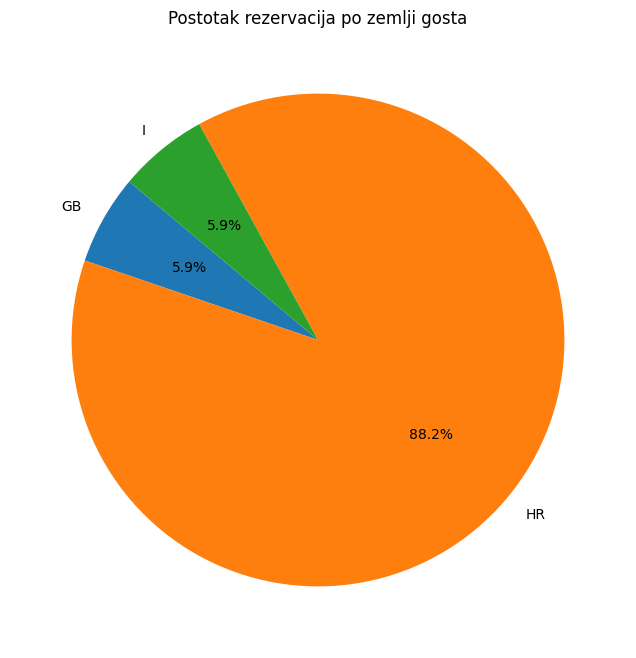

In [117]:
frekvencija_po_zemlji = third_february['guest_country_id'].value_counts().sort_index()

plt.figure(figsize=(10, 8))
plt.pie(frekvencija_po_zemlji, labels=frekvencija_po_zemlji.index, autopct='%1.1f%%', startangle=140)
plt.title('Postotak rezervacija po zemlji gosta')
plt.show()

In [118]:
february['adult_cnt'].mean()

31.482758620689655

In [119]:
108/february['adult_cnt'].mean()

3.430449069003286

Zakljucujemo da je Rijecki karveneval 2008. povecao broj dolazaka za 343%

Analiza utjecaja Rijeckog karnevala 2009. godine, koji se odrzao 22. veljace

In [120]:
february_2009 = dnevni_pregled_2009[dnevni_pregled_2009['date_from'].dt.month == 2]
february_2009

,date_from,adult_cnt
398,2009-02-01,15
399,2009-02-02,12
400,2009-02-03,49
401,2009-02-04,54
402,2009-02-05,31
403,2009-02-06,27
404,2009-02-07,13
405,2009-02-08,25
406,2009-02-09,4
407,2009-02-10,38


In [121]:
february_2009.mean()

date_from    2009-02-14 12:00:00
adult_cnt              34.285714
dtype: object

In [122]:
98/february_2009['adult_cnt'].mean()

2.8583333333333334

Zakljucujemo da je Rijecki karveneval 2008. povecao broj dolazaka za 286% 

In [123]:
(98/february_2009['adult_cnt'].mean()+108/february['adult_cnt'].mean())/2

3.1443912011683097

Mozemo zakljuciti da je u prosjeku utjecak Rijeckog karnevala na broj dolazaka gostiju oko 314%

Analiza dogadaja u ozujku

In [124]:
march_2008 = dnevni_pregled_2008[dnevni_pregled_2008['date_from'].dt.month == 3]
march_2008

,date_from,adult_cnt
61,2008-03-01,54
62,2008-03-02,31
63,2008-03-03,15
64,2008-03-04,35
65,2008-03-05,29
66,2008-03-06,36
67,2008-03-07,28
68,2008-03-08,16
69,2008-03-09,19
70,2008-03-10,11


In [146]:
march_2008.mean()

date_from    2008-03-16 00:00:00
adult_cnt              31.096774
dtype: object

In [142]:
march_2009 = dnevni_pregled_2009[dnevni_pregled_2009['date_from'].dt.month == 3]
march_2009

,date_from,adult_cnt
426,2009-03-01,11
427,2009-03-02,16
428,2009-03-03,40
429,2009-03-04,38
430,2009-03-05,27
431,2009-03-06,29
432,2009-03-07,13
433,2009-03-08,16
434,2009-03-09,26
435,2009-03-10,33


In [144]:
march_2009.mean()

date_from    2009-03-16 00:00:00
adult_cnt              24.677419
dtype: object

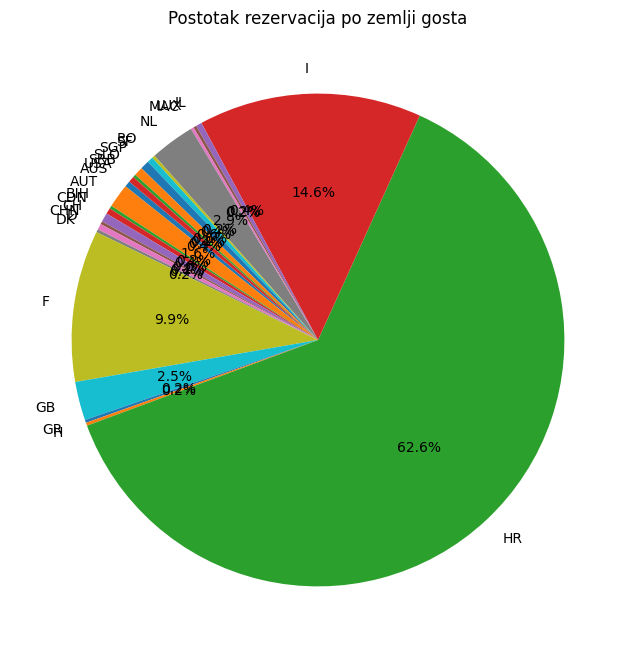

In [137]:
df_march = df_checkedOut_2008[df_checkedOut_2008['date_from'].dt.month == 3]
frekvencija_po_zemlji = df_march['guest_country_id'].value_counts().sort_index()

plt.figure(figsize=(10, 8))
plt.pie(frekvencija_po_zemlji, labels=frekvencija_po_zemlji.index, autopct='%1.1f%%', startangle=140)
plt.title('Postotak rezervacija po zemlji gosta')
plt.show()

In [139]:
df_march.info()

<class 'pandas.core.frame.DataFrame'>
Index: 513 entries, 2230 to 3477
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   reservation_id      513 non-null    int64         
 1   stay_date           513 non-null    datetime64[ns]
 2   guest_id            513 non-null    int64         
 3   guest_country_id    513 non-null    object        
 4   reservation_status  513 non-null    object        
 5   reservation_date    513 non-null    datetime64[ns]
 6   date_from           513 non-null    datetime64[ns]
 7   date_to             513 non-null    datetime64[ns]
 8   resort_id           513 non-null    int64         
 9   cancel_date         0 non-null      object        
 10  room_cnt            513 non-null    int64         
 11  adult_cnt           513 non-null    int64         
 12  children_cnt        513 non-null    int64         
 13  price               508 non-null    float64       


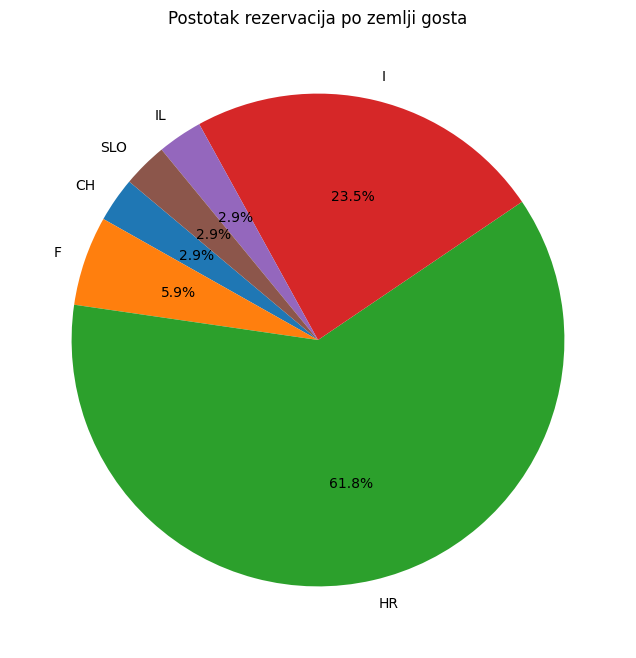

In [147]:
twentysix_march_2008 = df_march
twentysix_march_2008 = twentysix_march_2008[twentysix_march_2008['date_from'].dt.day == 26]
frekvencija_po_zemlji = twentysix_march_2008['guest_country_id'].value_counts().sort_index()

plt.figure(figsize=(10, 8))
plt.pie(frekvencija_po_zemlji, labels=frekvencija_po_zemlji.index, autopct='%1.1f%%', startangle=140)
plt.title('Postotak rezervacija po zemlji gosta')
plt.show()

Utjecaj Uskrsa na dolaznost.
2008. godine Uskrs pada na 23.3.2008, a 2009. 12.4.2009.

In [160]:
df_march_2008 = df_march
uskrs_2008 = df_march_2008
uskrs_2008 = uskrs_2008[uskrs_2008['date_from'].dt.day == 23]
uskrs_2008

,reservation_id,stay_date,guest_id,guest_country_id,reservation_status,reservation_date,date_from,date_to,resort_id,cancel_date,room_cnt,adult_cnt,children_cnt,price,price_tax,total_price_tax,total_price,food_price,food_price_tax,other_price,other_price_tax,room_category_id,sales_channel_id,stay_nights,price_per_night
3087,76206,2008-03-23,55165,F,Checked-out,2008-03-12,2008-03-23,2008-03-24,1,None,1,2,0,5198.184,519.833,975.499,9592.638,623.785,62.415,3770.669,393.251,5,3.0,1.0,5198.184
3092,76529,2008-03-23,108165,I,Checked-out,2008-03-23,2008-03-23,2008-03-24,1,None,1,2,0,6593.579,659.336,721.751,7396.214,623.785,62.415,178.850,0.000,6,3.0,1.0,6593.579
3096,76526,2008-03-23,108158,I,Checked-out,2008-03-23,2008-03-23,2008-03-24,1,None,1,2,0,773.640,77.360,85.910,873.090,85.450,8.550,14.000,0.000,5,3.0,1.0,773.640
3100,76528,2008-03-23,108161,I,Checked-out,2008-03-23,2008-03-23,2008-03-25,1,None,1,2,0,773.640,77.360,85.910,873.090,85.450,8.550,14.000,0.000,5,3.0,2.0,386.820
3101,76503,2008-03-23,619,HR,Checked-out,2008-03-22,2008-03-23,2008-03-24,1,None,1,1,0,1612.716,161.257,199.655,2008.668,311.929,31.171,84.023,7.227,2,10.0,1.0,1612.716
3104,76527,2008-03-23,108160,I,Checked-out,2008-03-23,2008-03-23,2008-03-24,1,None,1,3,0,7195.829,719.561,813.147,8284.843,935.714,93.586,153.300,0.000,6,3.0,1.0,7195.829


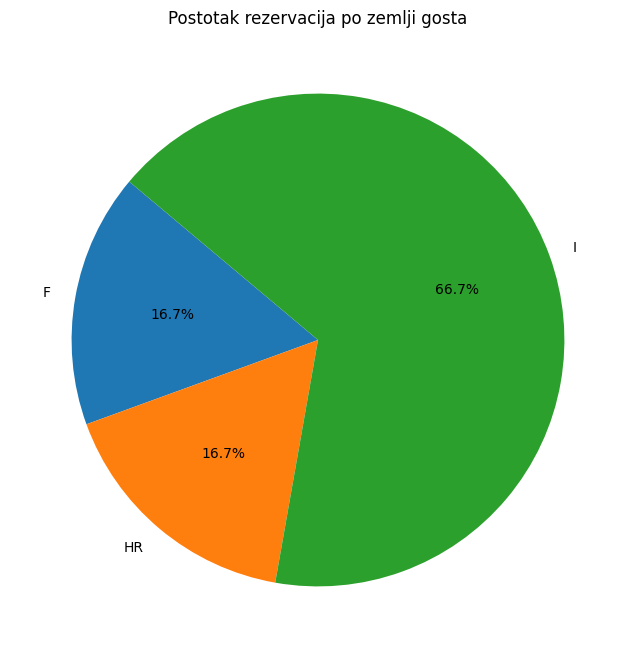

In [161]:
frekvencija_po_zemlji = uskrs_2008['guest_country_id'].value_counts().sort_index()

plt.figure(figsize=(10, 8))
plt.pie(frekvencija_po_zemlji, labels=frekvencija_po_zemlji.index, autopct='%1.1f%%', startangle=140)
plt.title('Postotak rezervacija po zemlji gosta')
plt.show()

In [157]:
df_april_2009 = df_checekedOut_2009[df_checekedOut_2009['date_from'].dt.month == 4]

In [162]:
uskrs_2009 = df_april_2009
uskrs_2009 = uskrs_2009[uskrs_2009['date_from'].dt.day == 12]

In [170]:
march_2008.mean()

date_from    2008-03-16 00:00:00
adult_cnt              31.096774
dtype: object

In [171]:
march_2008

,date_from,adult_cnt
61,2008-03-01,54
62,2008-03-02,31
63,2008-03-03,15
64,2008-03-04,35
65,2008-03-05,29
66,2008-03-06,36
67,2008-03-07,28
68,2008-03-08,16
69,2008-03-09,19
70,2008-03-10,11


In [172]:
12/march_2008['adult_cnt'].mean()

0.38589211618257263

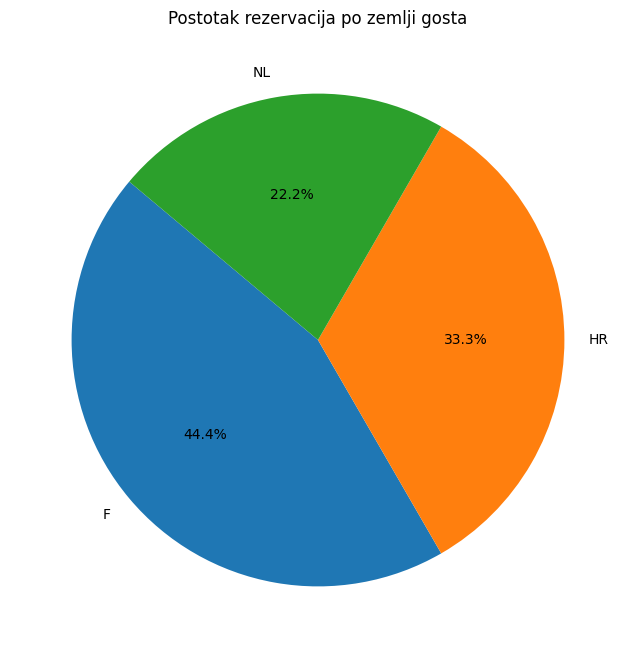

In [163]:
frekvencija_po_zemlji = uskrs_2009['guest_country_id'].value_counts().sort_index()

plt.figure(figsize=(10, 8))
plt.pie(frekvencija_po_zemlji, labels=frekvencija_po_zemlji.index, autopct='%1.1f%%', startangle=140)
plt.title('Postotak rezervacija po zemlji gosta')
plt.show()

In [167]:
april_2009 = dnevni_pregled_2009[dnevni_pregled_2009['date_from'].dt.month == 4]
april_2009

,date_from,adult_cnt
457,2009-04-01,68
458,2009-04-02,44
459,2009-04-03,28
460,2009-04-04,16
461,2009-04-05,18
462,2009-04-06,25
463,2009-04-07,34
464,2009-04-08,36
465,2009-04-09,52
466,2009-04-10,60


In [168]:
april_2009.mean()

date_from    2009-04-15 12:00:00
adult_cnt              40.066667
dtype: object

In [173]:
19/april_2009['adult_cnt'].mean()

0.4742096505823627

In [174]:
(12/march_2008['adult_cnt'].mean()+0.4742096505823627)/2

0.43005088338246766

Vidimo da se broj dolaznosti za uskrs smanji 43%, te da gosti vecinom nisu iz hrvatske.

Analiza Travnja